In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load the dataset

In [2]:
data = pd.read_csv('Clean_Dataset.csv', index_col=False)
data.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data = data.drop(data.columns[0], axis=1)
data.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Validate if there are no missing values in the dataframe.

In [4]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Encode the categorical variables

From exploratory analysis, it looks like there are a number of categorical data types. By look at 'object' types below, we can see there are 8 entries that are categorial in nature. After we see the categorical variables, we can convert them categories into numerical values using One Hot Encoding method.

In [5]:
print(data.dtypes)

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [6]:
columns = ["airline", "source_city", "departure_time", "stops", "destination_city", "class", "days_left"]
for col in columns:
    items = data[col].unique()
    print("Column:{} Counts:{} Items:{}".format(col, len(items), items))

Column:airline Counts:6 Items:['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Column:source_city Counts:6 Items:['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Column:departure_time Counts:6 Items:['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Column:stops Counts:3 Items:['zero' 'one' 'two_or_more']
Column:destination_city Counts:6 Items:['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Column:class Counts:2 Items:['Economy' 'Business']
Column:days_left Counts:49 Items:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


In [7]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['airline', 
               'source_city', 
               'departure_time', 
               'stops', 
               'arrival_time', 
               'destination_city',
               'class']

ohe = OneHotEncoder(handle_unknown='ignore')

ohe_df =  pd.DataFrame(ohe.fit_transform(data[cat_columns]).toarray())

ohe_df.columns = ohe.get_feature_names(cat_columns)

data.drop(cat_columns, axis = 1, inplace = True)

data = data.join(ohe_df)
data.head(10)

/Users/christopher_sia/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,flight,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,SG-8709,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,SG-8157,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,I5-764,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,UK-995,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,UK-963,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,UK-945,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,UK-927,2.08,1,6060,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,UK-951,2.17,1,6060,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,G8-334,2.17,1,5954,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,G8-336,2.25,1,5954,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Scaling the continous variables

We next deal with the continuous variables to have a consistent scale, using the StandardScaler function. First, we look at the columns where the data range is not within [0.0, 1.0]. duration is the column that requires scaling.

In [8]:
stats = data.agg(['min', 'max'])

for col in data.columns:
    if data[col].dtype.type is np.object_:
        continue

    if stats[col].max() > 1.0:
        print("Column Name: {}, Min: {}, Max: {}".format(col, stats[col].min(), stats[col].max()))

Column Name: duration, Min: 0.83, Max: 49.83
Column Name: days_left, Min: 1, Max: 49
Column Name: price, Min: 1105, Max: 123071


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['duration'] = scaler.fit_transform(np.array(data['duration']).reshape(-1,1))
data.head(10)

,flight,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,SG-8709,-1.397531,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,SG-8157,-1.375284,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,I5-764,-1.397531,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,UK-995,-1.386407,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,UK-963,-1.375284,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,UK-945,-1.375284,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,UK-927,-1.410045,1,6060,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,UK-951,-1.397531,1,6060,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,G8-334,-1.397531,1,5954,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,G8-336,-1.386407,1,5954,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Baseline Model Evaluation

We have no idea which model will do well on this data. Let's design a test harness with 10-fold cross-validation. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 being perfect)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
print(data.columns)

Index(['flight', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')


## Baseline Model Evaluation

We have no idea which model will do well on this data. Let's design a test harness with 10-fold cross-validation. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 being perfect). In addition, I extract a data sample that extract only 5% of the train set for the test harness - this is to enable the test harness to complete quickly.

In [12]:
sample_data = data.sample(frac=0.05)
sample_x = sample_data.drop(columns=['flight','price'])
sample_y = sample_data['price']
print(sample_x.shape, sample_y.shape)

(15008, 37) (15008,)


In [13]:
import time 

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('AB', AdaBoostRegressor()))
models.append(('ET', ExtraTreesRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=21)
    start = time.time()
    cv_results = cross_val_score(model, sample_x, sample_y, cv=kfold, scoring='neg_mean_squared_error')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "{}: MEAN {:.4f} STD: {:.4f} RUN_TIME: {:.3f}".format(name, abs(cv_results.mean()), cv_results.std(), end-start))


LR: MEAN -45423166.2580 STD: 2126108.3468 RUN_TIME: 0.153
LASSO: MEAN -45422673.8062 STD: 2126149.6509 RUN_TIME: 1.526
EN: MEAN -169424026.3178 STD: 5803524.4307 RUN_TIME: 0.115
KNN: MEAN -78467751.4452 STD: 5431208.6026 RUN_TIME: 3.394
CART: MEAN -26096665.1953 STD: 2907100.4662 RUN_TIME: 0.605
SVR: MEAN -694369784.9014 STD: 21993349.4588 RUN_TIME: 117.814
GBM: MEAN -24550914.1672 STD: 2017798.4749 RUN_TIME: 8.767
RFR: MEAN -14869495.8145 STD: 1648901.9194 RUN_TIME: 34.962
AB: MEAN -34395747.3012 STD: 2316235.5028 RUN_TIME: 2.940
ET: MEAN -16180071.3498 STD: 1562338.0449 RUN_TIME: 36.384


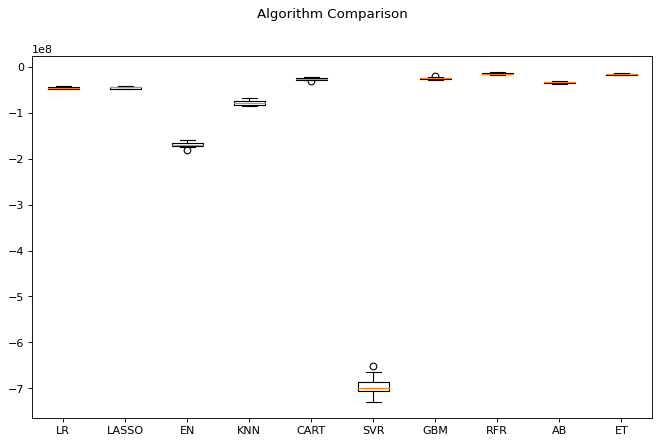

In [14]:
fig = plt.figure(figsize=(10, 6), dpi=80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The nest number of estimator is 400

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_estimators=np.array([50,100,200,300,400,500]))
model = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
start = time.time()
grid_result = grid.fit(sample_x, sample_y)
end = time.time()

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("MSE: {:.4f} STD: {:.4f} with: {}".format(mean, stdev, param))

print("Best: {:.4f} using {} (run time : {:.3f})".format(grid_result.best_score_, grid_result.best_params_, end-start))

MSE: -15147555.3793 STD: 1727990.7693 with: {'n_estimators': 50}
MSE: -15026478.9087 STD: 1684258.6741 with: {'n_estimators': 100}
MSE: -14896784.9742 STD: 1737891.8969 with: {'n_estimators': 200}
MSE: -14793581.0805 STD: 1625616.6817 with: {'n_estimators': 300}
MSE: -14787006.9144 STD: 1708263.5801 with: {'n_estimators': 400}
MSE: -14815981.0750 STD: 1657511.1397 with: {'n_estimators': 500}
Best: -14787006.9144 using {'n_estimators': 400} (run time : 604.193)


## Prepare training data

Now prepare the train-test set from the original data set. The train-test ratio shall be 80:20.

In [16]:
train_X = data.drop(columns=['flight','price'])
train_Y = data['price']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.20, random_state=21)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((240122, 37), (60031, 37), (240122,), (60031,))

## Model Training

### Baseline training

In [23]:
model_RFR = RandomForestRegressor(random_state=45, n_estimators=400)
print("Training Random Forest model with estimators={}".format(400))
start = time.time()
model_RFR.fit(train_x, train_y)
end = time.time()

print("Training completed with run time {:.3f} seconds".format(end-start))

Training Random Forest model with estimators=400
Training completed with run time 294.499 seconds


In [24]:
print("Validate model on train set")
predict_train = model_RFR.predict(train_x)
print('RMSE on train data: {:.4f}'.format(mean_squared_error(train_y, predict_train)**(0.5)))

print("Validate model on test set")
predict_test = model_RFR.predict(test_x)
print('RMSE on test data: {:.4f}'.format(mean_squared_error(test_y, predict_test)**(0.5)))

Validate model on train set
RMSE on train data: 1113.6968
Validate model on test set
RMSE on test data: 2766.4605


In [33]:
diff = abs(test_y - predict_test)
percent_diff = diff/test_y * 100

compare = pd.DataFrame({'Ground Truths' : test_y, 
                        'Prediction': predict_test.round(decimals=2), 
                        'Difference': diff.round(decimals=2),
                        '% Difference': percent_diff.round(decimals=2)})
compare.head(10)

,Ground Truths,Prediction,Difference,% Difference
144417,5760,5957.41,197.41,3.43
16641,6919,6075.68,843.31,12.19
294793,44546,44663.86,117.86,0.26
287480,67029,76852.59,9823.59,14.66
196349,4612,4612.00,0.00,0.00
143756,11739,11698.85,40.15,0.34
285651,63691,51640.60,12050.40,18.92
247622,32923,32923.00,0.00,0.00
59398,4056,4298.17,242.17,5.97
227223,59917,67586.20,7669.20,12.80


In [34]:
import joblib

joblib.dump(model_RFR, "rfr_model.joblib")

['rfr_model.joblib']

### Model training with important features

After the preprocessing and encoding steps, the train data set has a total of 37 attributes which not all are useful in forecasting the prices. We can select the top attributes that have the bigger contribution in forecasting price values. Using less attributes to train a comparable model will result in a less complex model. From the chart below, there are only 4 attributes that seem to have a bigger impact on the model (quite intuitively so).

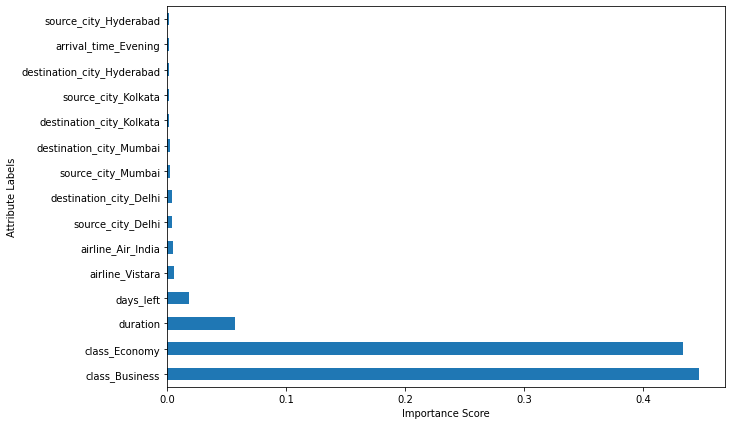

In [35]:
# plot the 15 most important features 
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(15).plot(kind='barh');
plt.xlabel('Importance Score')
plt.ylabel('Attribute Labels')
plt.show()

In [36]:
impact_columns = ['class_Business', 
                  'class_Economy',
                  'duration',
                  'days_left', 
                  'airline_Vistara', 
                  'airline_Air_India', 
                  'source_city_Delhi', 
                  'destination_city_Delhi', 
                  'source_city_Mumbai', 
                  'destination_city_Mumbai']

train_x_if = train_x[impact_columns]
test_x_if = test_x[impact_columns]

model_RFR_with_if = RandomForestRegressor(random_state=45, n_estimators=400)

# fit the model with the training data
start = time.time()
model_RFR_with_if.fit(train_x_if, train_y)
end = time.time()
print("Training completed with run time {:.3f} seconds".format(end-start))

# predict the target on the training and test data
print("Validate model on train set")
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))

print("Validate model on test set")
predict_test_with_if = model_RFR_with_if.predict(test_x_if)
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

Training completed with run time 131.121 seconds
Validate model on train set
RMSE on train data:  2790.384303866063
Validate model on test set
RMSE on test data:  4668.73198157494


It's interesting to note that the RMSE is actually worse for the model with reduced attributes. For now, I just retained the original model with 37 attributes as the final trained model.